#### Anomaly and Outlier Detection
The goal of anomaly detection is to identify cases that are unusual within our seemingly homogeneous data. Outliers are cases that are unusual because they fall outside the distribution that is considered normal for the data. The distance from the center of a normal distribution indicates how typical a given point is with respect to the distribution of the data. Each case can be ranked according to the probability that it is either typical or atypical.

Anomaly detection is a form of classification and is implemented as one-class classification, because only one class is represented in the training data. An anomaly detection model predicts whether a data point is typical for a given distribution or not. An atypical data point can be either an outlier or an example of a previously unseen class. Normally, a classification model must be trained on data that includes both examples and counter-examples for each class so that the model can learn to distinguish between them.

It is often used in preprocessing to remove anomalous data from the dataset. In supervised learning, removing the anomalous data from the dataset often results in a statistically significant increase in accuracy.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Monthly.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,GasPriceStatus
0,31,2008-05-31,75.85,125.40,2153.316,1576.387,11.27,SPRING,HIGH
1,61,2008-06-30,81.18,133.88,2118.791,1604.249,12.69,SUMMER,HIGH
2,92,2008-07-31,89.19,133.37,2205.260,1708.641,11.09,SUMMER,HIGH
3,123,2008-08-31,87.05,116.67,2193.566,1682.924,8.26,SUMMER,HIGH
4,153,2008-09-30,85.63,104.11,1919.520,1460.924,7.67,FALL,HIGH


#### Outlier Detection
We will implement two types of outlier detection:
1. Median-absolute-deviation (MAD) based outlier detection - which is a method that measures the distance of all points from the median in terms of median distance
2. Percentile based outlier detection

The MAD-based classifier works correctly regardless of sample-size, while the percentile based classifier classifies more points the larger the sample size is, regardless of whether or not they are actually outliers. Therefore, in this work, MAD-based classifier is accepted as a more robust form of outlier detection.

Since these two methodologies deal with univariate data, we will look at the the following variables one at a time: AveCoalPrice, OilPrice, GrossGasProd, TotGasCons, and GasPrice



In [4]:
Xcoal=df.AveCoalPrice.values

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


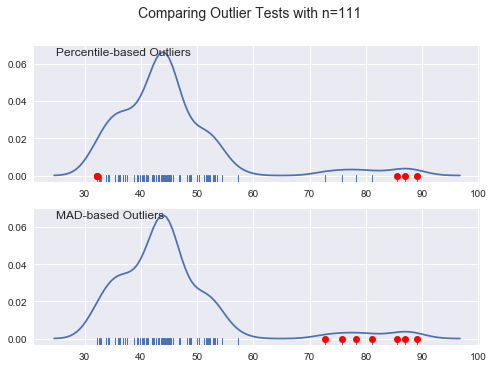

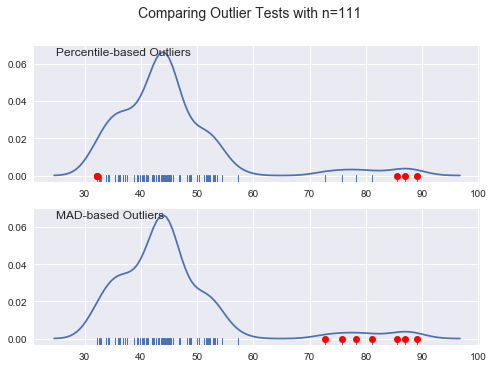

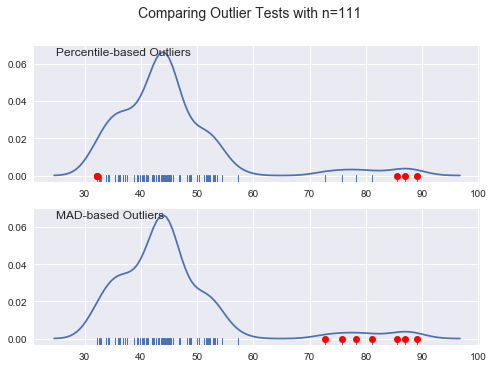

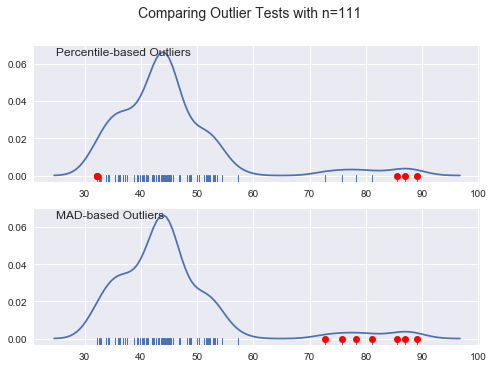

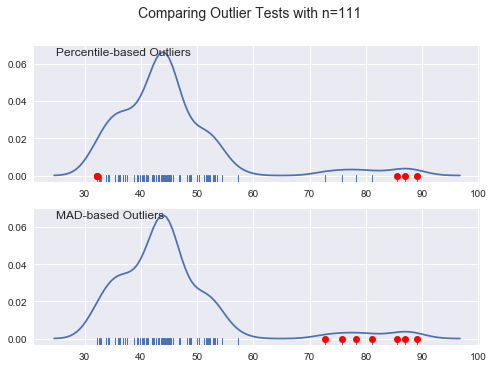

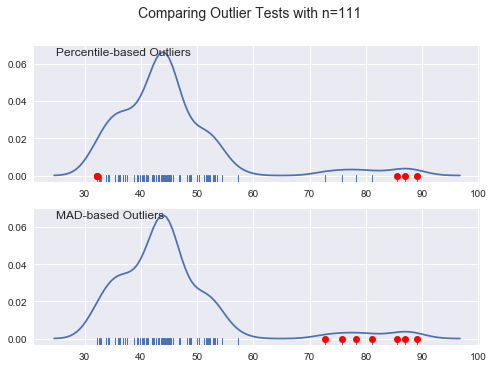

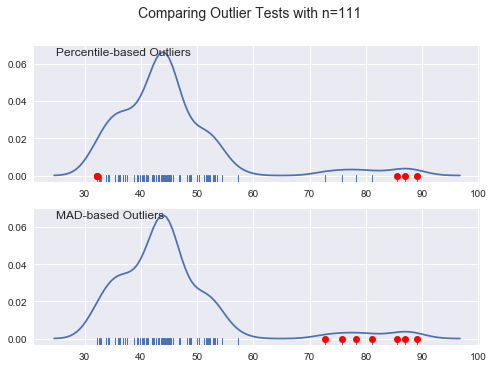

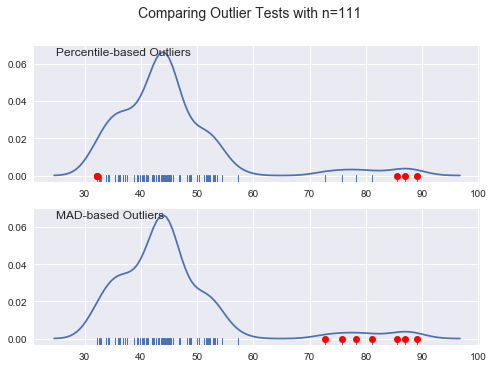

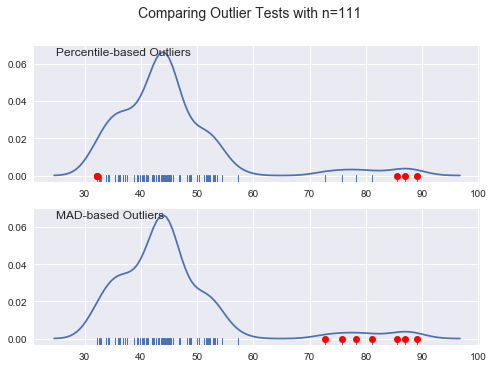

In [6]:
def main():
    df=pd.read_excel("data/DataSet_GasPrice_ Monthly.xlsx")
    for X in df:
        # Generate some data
        Xcoal=df.AveCoalPrice.values

        plot(Xcoal)

    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(Xcoal)), size=14)

main()

The MAD-based outlier detection technique detects average coal price > 70 as outliers. These values are colored red.

In [7]:
Xoil=df.OilPrice.values

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


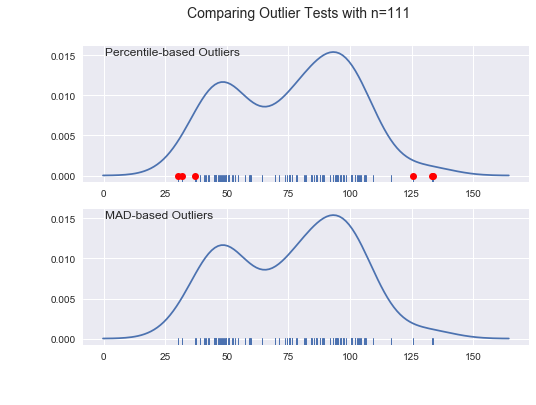

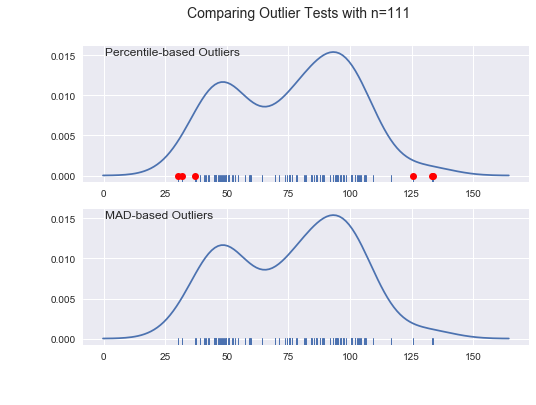

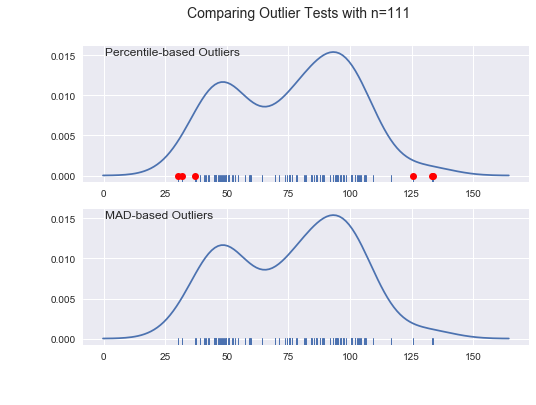

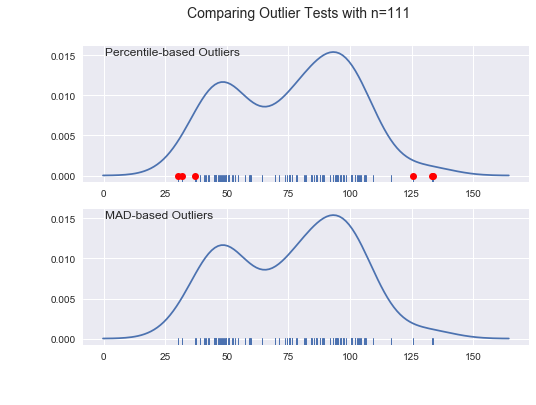

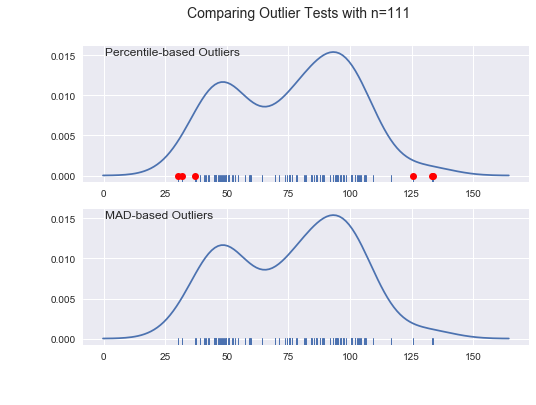

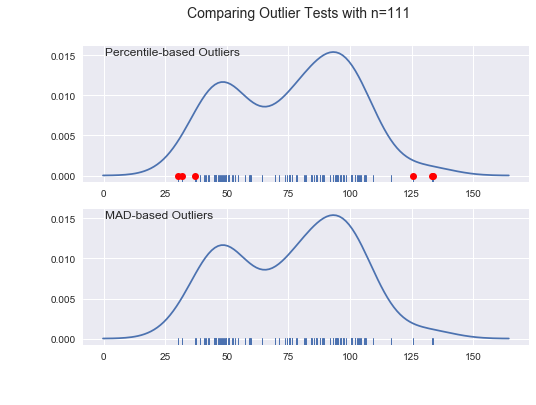

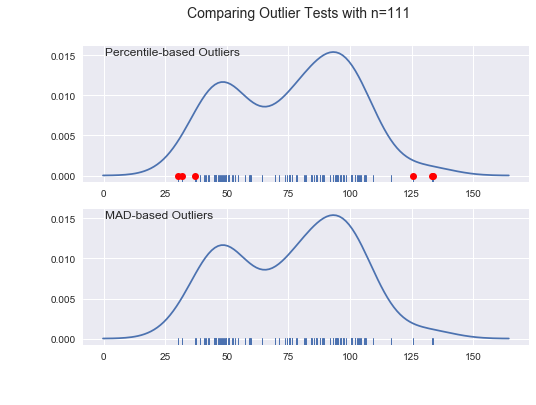

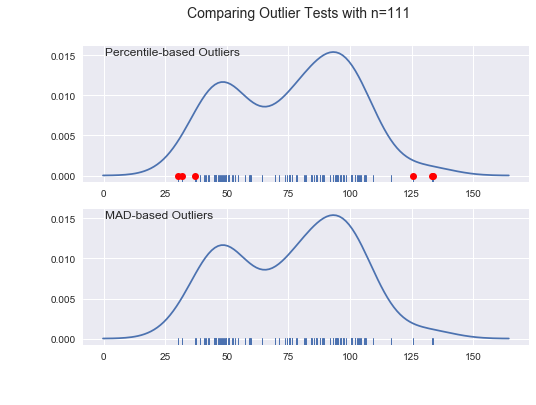

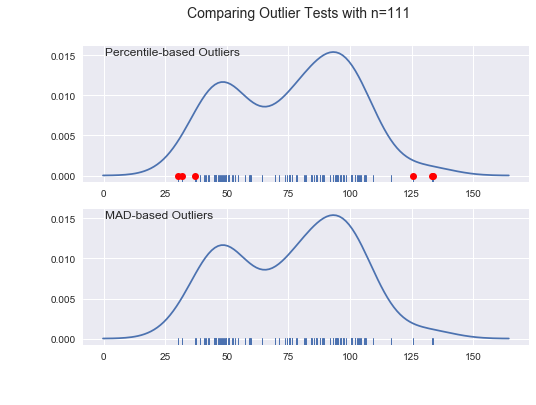

In [8]:
def main():
    df=pd.read_excel("data/DataSet_GasPrice_ Monthly.xlsx")
    for X in df:
        # Generate some data
        Xoil=df.OilPrice.values

        plot(Xoil)

    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(Xoil)), size=14)

main()

The MAD-based outlier detection technique does not detect any outlier in the oil price data.

In [10]:
XgasProd=df.GrossGasProd.values

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


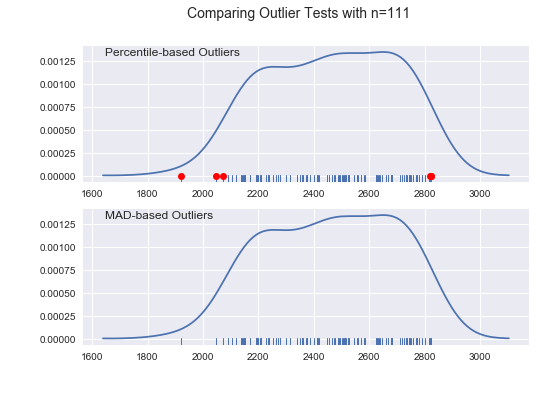

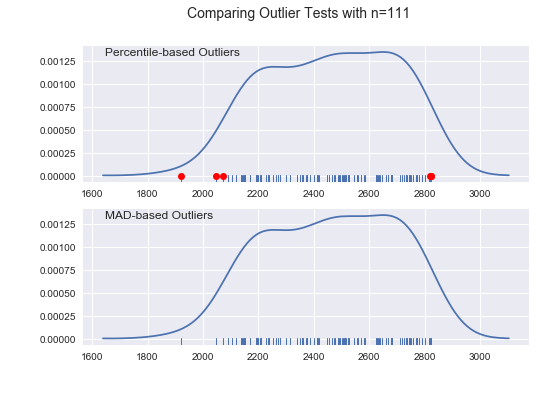

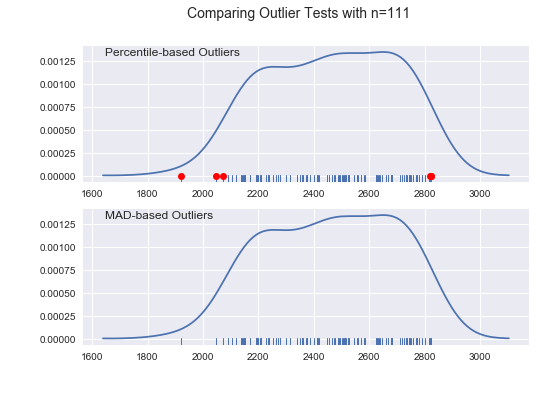

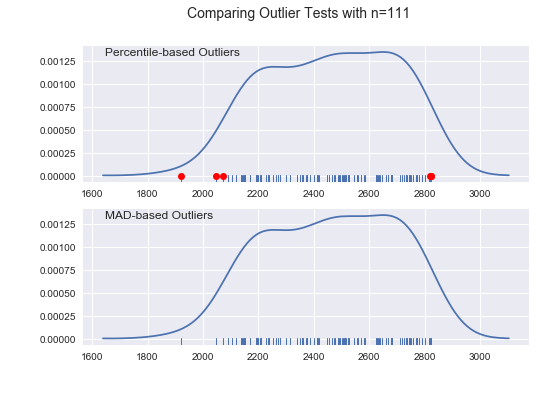

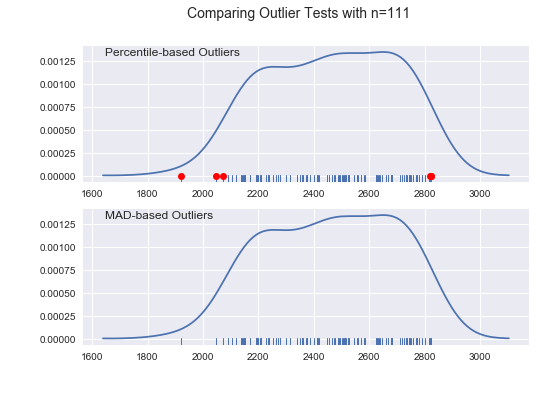

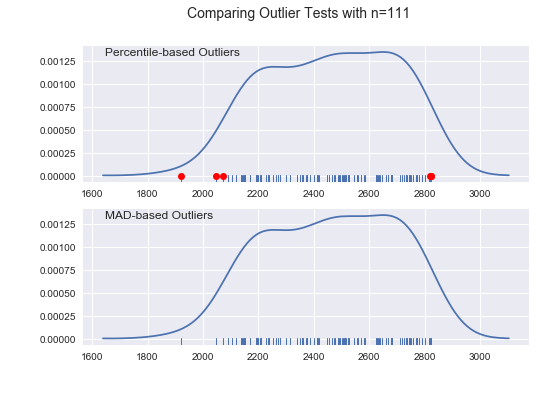

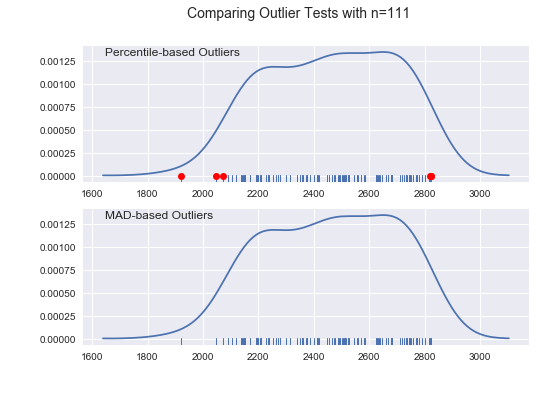

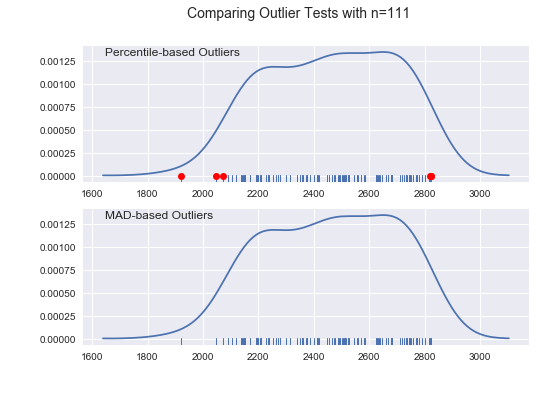

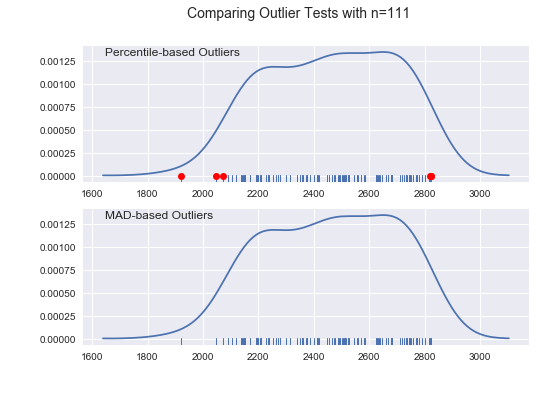

In [11]:
def main():
    df=pd.read_excel("data/DataSet_GasPrice_ Monthly.xlsx")
    for X in df:
        # Generate some data
        XgasProd=df.GrossGasProd.values

        plot(XgasProd)

    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(XgasProd)), size=14)

main()

The MAD-based outlier detection technique does not detect any outlier in the total gas production data.

In [12]:
XgasCons=df.TotGasCons.values

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


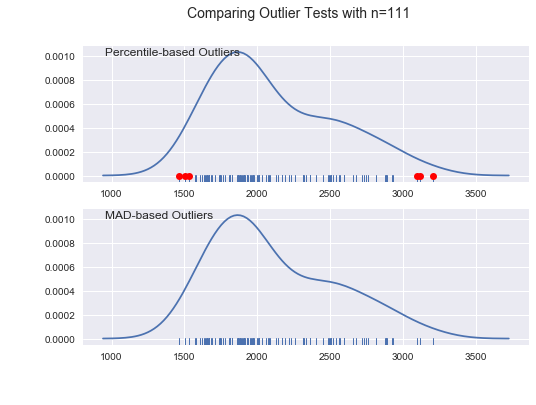

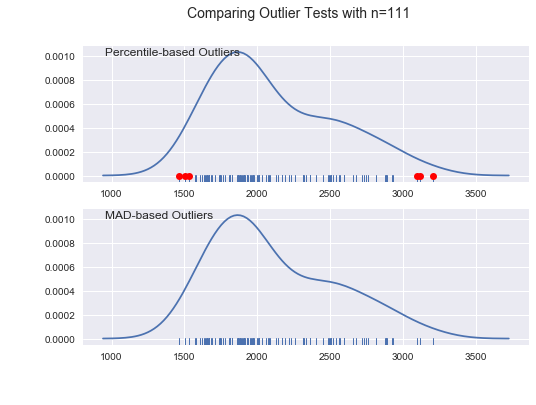

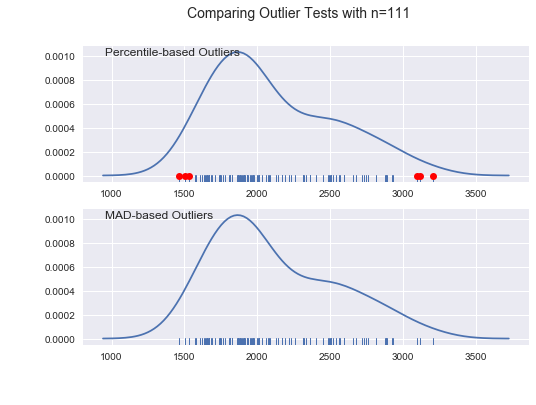

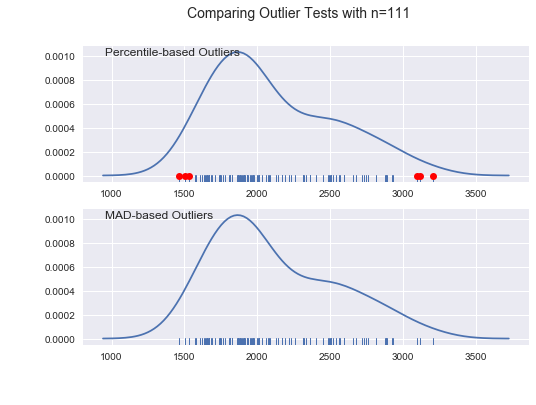

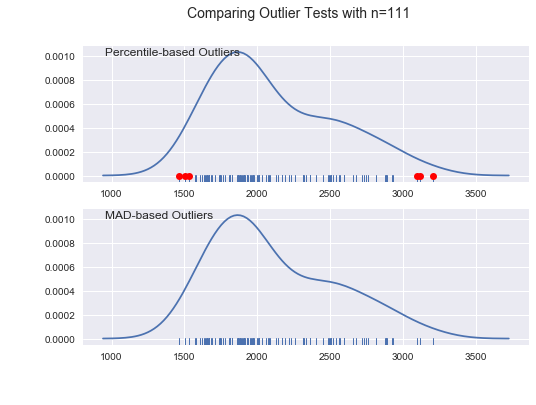

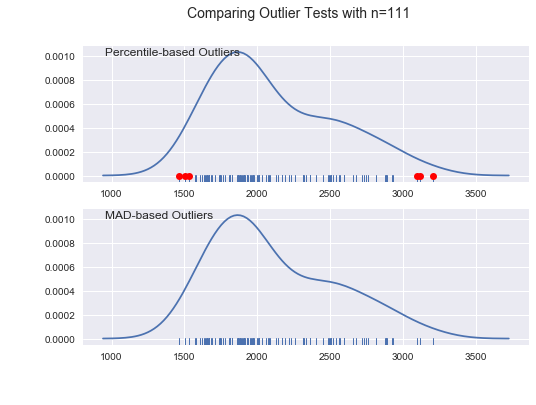

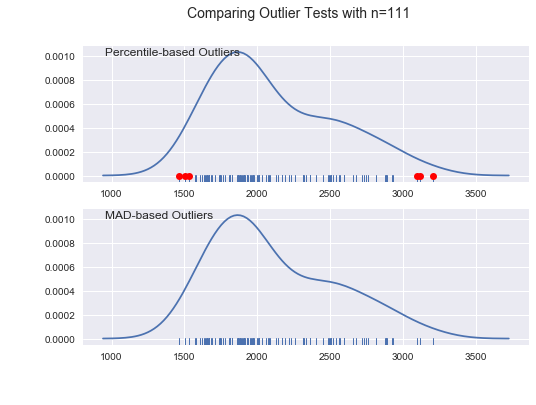

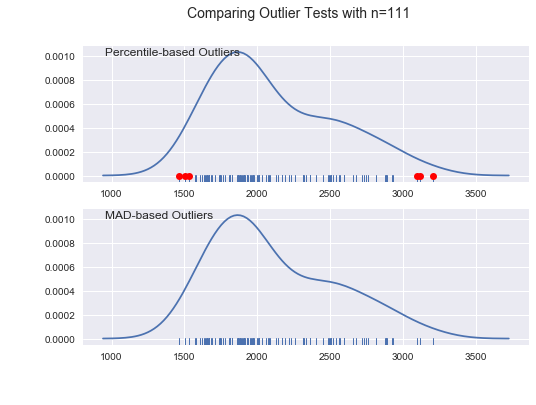

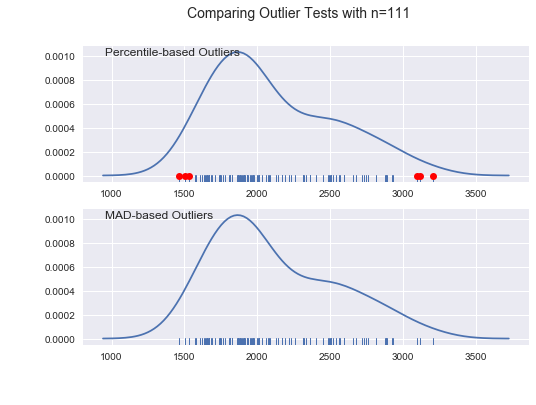

In [13]:
def main():
    df=pd.read_excel("data/DataSet_GasPrice_ Monthly.xlsx")
    for X in df:
        # Generate some data
        XgasCons=df.TotGasCons.values

        plot(XgasCons)

    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(XgasCons)), size=14)

main()

The MAD-based outlier detection technique does not detect any outlier in the total gas consumption data.

In [14]:
XgasPrice=df.GasPrice.values

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


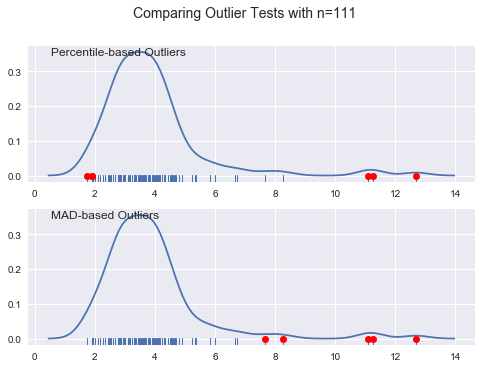

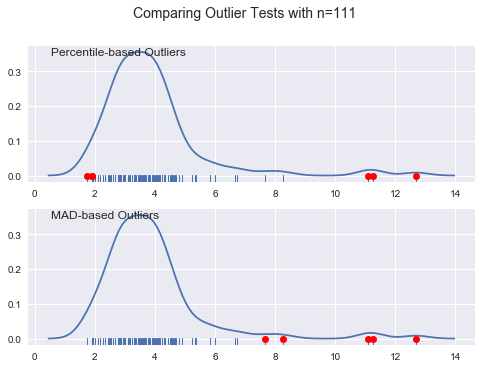

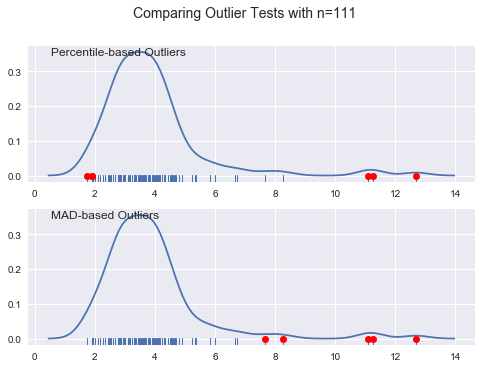

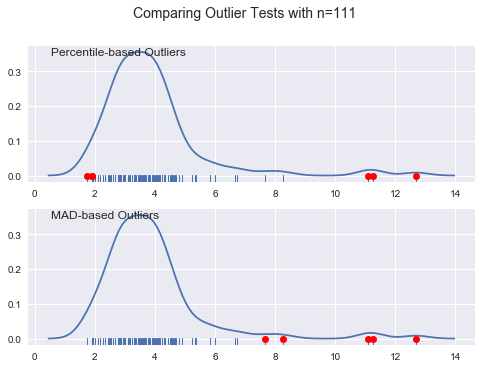

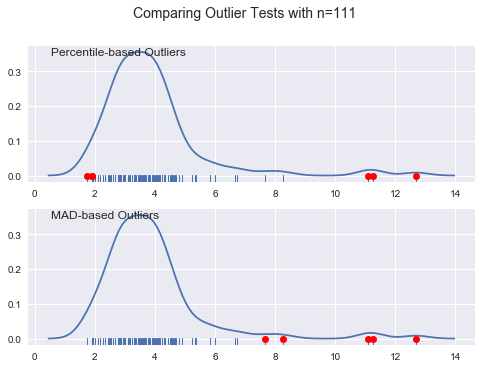

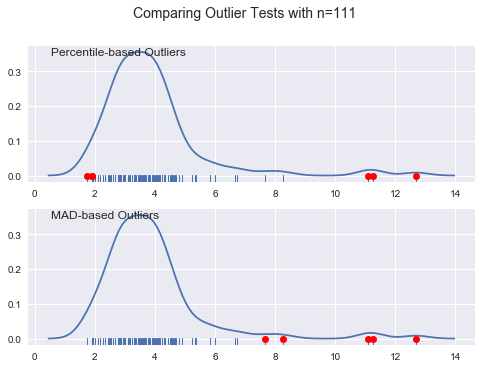

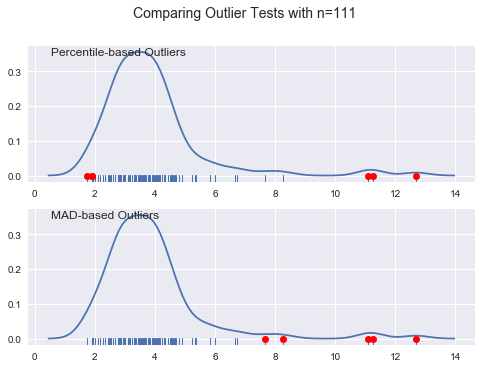

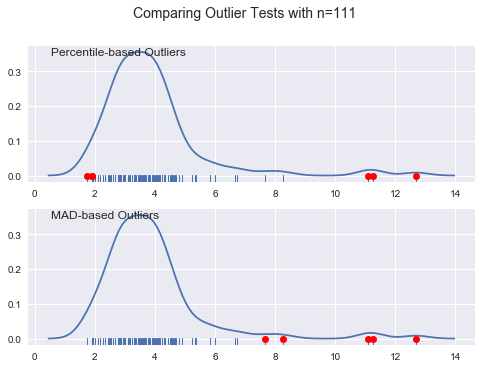

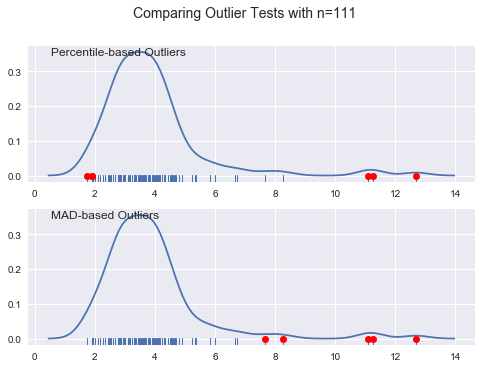

In [15]:
def main():
    df=pd.read_excel("data/DataSet_GasPrice_ Monthly.xlsx")
    for X in df:
        # Generate some data
        XgasPrice=df.GasPrice.values

        plot(XgasPrice)

    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(XgasPrice)), size=14)

main()


The MAD-based outlier detection technique detects Gas Price > US$7 as outliers. These values are colored red.

#### Kernel Density Estimation
Another methodology used for novelty anomaly detection in this work is to fit and plot a bivariate kernel density estimate.

In [16]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline

In [17]:
# Generate train data
dfanm = df[['AveCoalPrice', 'OilPrice', 'GrossGasProd', 'TotGasCons']]
dfanm.head()

,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons
0,75.85,125.40,2153.316,1576.387
1,81.18,133.88,2118.791,1604.249
2,89.19,133.37,2205.260,1708.641
3,87.05,116.67,2193.566,1682.924
4,85.63,104.11,1919.520,1460.924


In [18]:
X = dfanm.values

In [19]:
y = df['GasPrice'].values
y[0]

11.27

#### Split the numpy array
Split arrays or matrices into random train and test subsets

In [20]:
import numpy as np
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\Angus\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
X_train[:,0]

array([ 53.62 ,  78.34 ,  45.26 ,  44.69 ,  53.18 ,  51.99 ,  40.23 ,
        36.73 ,  51.65 ,  45.036,  57.22 ,  50.33 ,  44.736,  43.86 ,
        48.24 ,  42.06 ,  37.24 ,  34.13 ,  46.76 ,  54.37 ,  33.79 ,
        43.69 ,  39.4  ,  43.17 ,  44.58 ,  87.05 ,  39.33 ,  53.08 ,
        40.35 ,  72.71 ,  36.22 ,  32.58 ,  35.32 ,  44.96 ,  44.19 ,
        32.91 ,  43.85 ,  41.188,  45.19 ,  36.35 ,  32.26 ,  53.04 ,
        44.584,  42.3  ,  34.11 ,  43.662,  42.22 ,  50.39 ,  36.04 ,
        44.964,  44.69 ,  36.21 ,  52.88 ,  48.9  ,  32.12 ,  81.18 ,
        44.82 ,  43.84 ,  89.19 ,  44.78 ,  37.23 ,  32.71 ,  42.73 ,
        37.53 ,  40.842,  36.32 ,  43.   ,  44.864,  44.904,  36.01 ,
        41.   ,  34.36 ,  44.1  ,  33.79 ])

#### Novelty Anomaly Detection

Firstly we will estimate a Gaussian distribution for each feature in the data. Recall that to define a probability distribution we need two things - mean and variance. To accomplish this we'll create a simple function that calculates the mean and variance for each feature in our data set.

In [23]:
def estimate_gaussian(X_train):  
    mu = X_train.mean(axis=0)
    sigma = X_train.var(axis=0)

    return mu, sigma

mu, sigma = estimate_gaussian(X_train)  
mu, sigma 

(array([   45.15067568,    75.18121622,  2474.35243243,  2082.033     ]),
 array([  1.35730858e+02,   6.32965984e+02,   4.80833242e+04,
          1.47992779e+05]))

Now that we have our model parameters, we need to determine a probability threshold which indicates that an data point should be considered an anomaly. To do this, we need to use a set of labeled validation data and test the model's performance at identifying those anomalies given different threshold values.

Furthermore, we also need a way to calculate the probability that a data point belongs to a normal distribution given some set of parameters. Fortunately SciPy has this built-in.

In [24]:
from scipy import stats  
dist = stats.norm(mu[0], sigma[0])  
dist.pdf(X_train[:,0])[0:50]  

array([ 0.0029335 ,  0.00285265,  0.00293921,  0.0029392 ,  0.00293408,
        0.00293549,  0.00293728,  0.00293356,  0.00293585,  0.00293921,
        0.00292762,  0.00293708,  0.0029392 ,  0.00293908,  0.00293845,
        0.00293845,  0.00293423,  0.00292954,  0.00293901,  0.00293244,
        0.00292894,  0.00293905,  0.00293658,  0.0029389 ,  0.00293919,
        0.00280246,  0.00293651,  0.0029342 ,  0.00293738,  0.00287925,
        0.00293286,  0.00292664,  0.00293152,  0.00293921,  0.00293914,
        0.00292729,  0.00293908,  0.00293796,  0.00293922,  0.00293304,
        0.00292599,  0.00293425,  0.00293919,  0.00293857,  0.00292951,
        0.00293904,  0.00293853,  0.00293703,  0.0029326 ,  0.00293921])

We just calculated the probability that each of the first 50 instances of our data set's first dimension belong to the distribution that we defined earlier by calculating the mean and variance for that dimension. Essentially it's computing how far each instance is from the mean and how that compares to the "typical" distance from the mean for this data.

Let's compute and save the probability density of each of the values in our data set given the Gaussian model parameters we calculated above.

In [25]:
p = np.zeros((X_train.shape[0], X_train.shape[1]))  
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X_train[:,0])  
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X_train[:,1])

p.shape  

(74, 4)

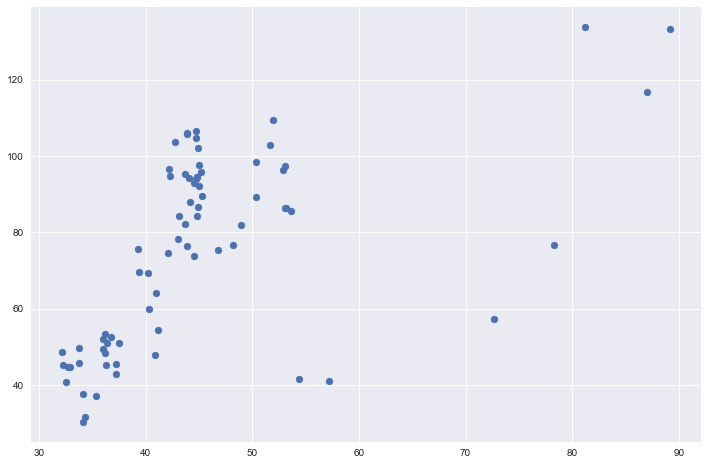

In [28]:
outliers = np.where(p > 0.002920894)
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X_train[:,0], X_train[:,1])  

#### Plot of Average Coal Price vs Oil Price
A scatter plot of the average coal price vs oil price suggests that there's a pretty tight cluster in towards the left with several values further out away from the cluster towards the right. In this case, these could be considered anomalies. To find out, we will use kde plots to detect those data points that fall outside the kernel density.


#### kde Plot of Average Coal Price vs Oil Price
A kde plot shows the points enclosed in the cluster, while the points outside the enclosure could be regarded as anomalies. 

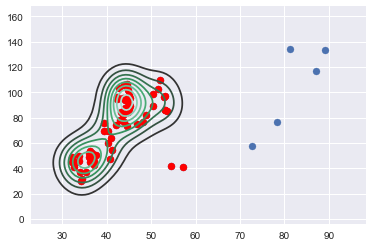

In [29]:
ax = sns.kdeplot(X_train[:,0], X_train[:,1])
ax.scatter(X_train[:,0], X_train[:,1])  
# indexes of the values considered to be outliers
outliers = np.where(p > 0.002921894)
ax.scatter(X_train[outliers[0],0], X_train[outliers[0],1], s=50, color='r', marker='o') 

#### kde Plot of Average Coal Price vs Gross Gas Production
A kde plot shows the points enclosed in the cluster, while the points outside the enclosure could be regarded as anomalies. 

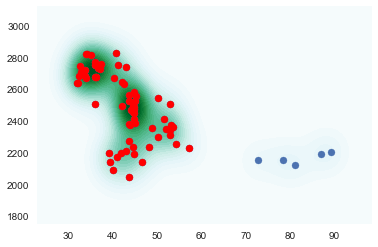

In [31]:
ax = sns.kdeplot(X_train[:,0], X_train[:,2], shade=True, color="r", n_levels=30)
ax.scatter(X_train[:,0], X_train[:,2]) 
# indexes of the values considered to be outliers
outliers = np.where(p > 0.002921894)
ax.scatter(X_train[outliers[0],0], X_train[outliers[0],2],s=50, color='r', marker='o') 

#### kde Plot of Average Coal Price vs Total Gas Consumption
A kde plot shows the points enclosed in the cluster, while the points outside the enclosure could be regarded as anomalies.

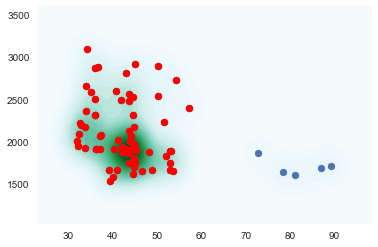

In [33]:
ax = sns.kdeplot(X_train[:,0], X_train[:,3], shade=True, color="r", n_levels=30)
ax.scatter(X_train[:,0], X_train[:,3]) 
# indexes of the values considered to be outliers
outliers = np.where(p > 0.002921894)
ax.scatter(X_train[outliers[0],0], X_train[outliers[0],3],s=50, color='r', marker='o') 


#### kde Plot of Average Coal Price vs Gas Price
A kde plot shows the points enclosed in the cluster, while the points outside the enclosure could be regarded as anomalies.

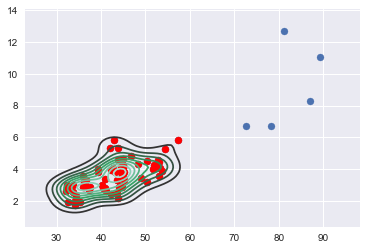

In [35]:
ax = sns.kdeplot(X_train[:,0], y_train[:,])
ax.scatter(X_train[:,0], y_train[:,]) 
# indexes of the values considered to be outliers
outliers = np.where(p > 0.002921894)
ax.scatter(X_train[outliers[0],0], y_train[outliers[0],],s=50, color='r', marker='o') 

The bivariate kde plots suggest consistently that Ave coal price > 70 could be considered anomalies as they all fall outside the cluster contours.

#### kde Plot of Oil Price vs Total Gas Production
A kde plot shows that most of the points are enclosed in the cluster.

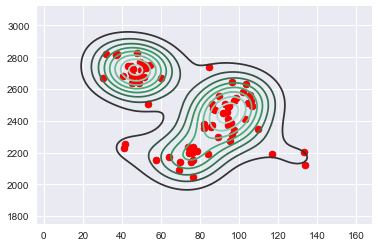

In [38]:
ax = sns.kdeplot(X_train[:,1], X_train[:,2])
ax.scatter(X_train[:,1], X_train[:,2]) 
# indexes of the values considered to be outliers
outliers = np.where(p > 0.002721894)
ax.scatter(X_train[outliers[0],1], X_train[outliers[0],2],s=50, color='r', marker='o') 

#### kde Plot of Oil Price vs Total Gas Consumption
A kde plot shows that most of the points are enclosed in the cluster.

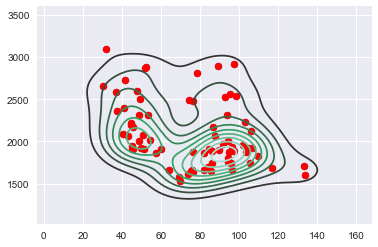

In [40]:
ax = sns.kdeplot(X_train[:,1], X_train[:,3])
ax.scatter(X_train[:,1], X_train[:,3]) 
# indexes of the values considered to be outliers
outliers = np.where(p >0.002721894)
ax.scatter(X_train[outliers[0],1], X_train[outliers[0],3],s=50, color='r', marker='o') 

#### kde Plot of Oil Price vs Gas Price
A kde plot shows that the points located outside the cluster are primarily driven by possible anomalous gas price data points (Gas Price > 7).

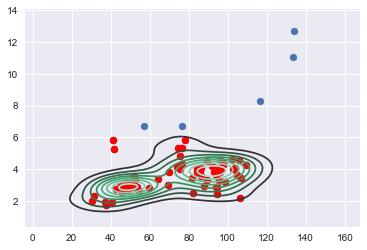

In [47]:
ax = sns.kdeplot(X_train[:,1], y_train[:,])
ax.scatter(X_train[:,1], y_train[:,]) 
# indexes of the values considered to be outliers
outliers = np.where(p > 0.002921894)
ax.scatter(X_train[outliers[0],1], y_train[outliers[0],],s=50, color='r', marker='o') 

#### kde Plot of Gross Gas Production vs Total Gas Consumption
A kde plot shows that most of the points are enclose in the cluster.

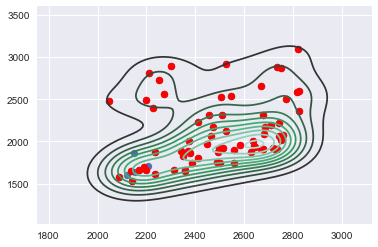

In [51]:
ax = sns.kdeplot(X_train[:,2], X_train[:,3])
ax.scatter(X_train[:,2], X_train[:,3]) 
# indexes of the values considered to be outliers
outliers = np.where(p > 0.002921894)
ax.scatter(X_train[outliers[0],2], X_train[outliers[0],3],s=50, color='r', marker='o') 

#### kde Plot of Gross Gas Production vs Gas Price
A kde plot shows that points outside the enclosure which may be considered as anomalies are driven primarily by the gas price.

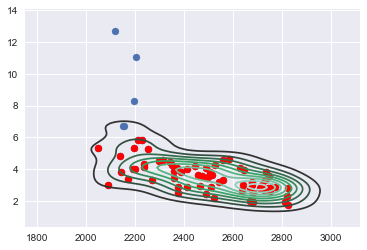

In [54]:
ax = sns.kdeplot(X_train[:,2], y_train[:,])
ax.scatter(X_train[:,2], y_train[:,]) 
# indexes of the values considered to be outliers
outliers = np.where(p > 0.002921894)
ax.scatter(X_train[outliers[0],2], y_train[outliers[0],],s=50, color='r', marker='o') 

#### kde Plot of Total Gas Consumption vs Gas Price
A kde plot shows that points outside the enclosure which may be considered as anomalies are driven primarily by the gas price.

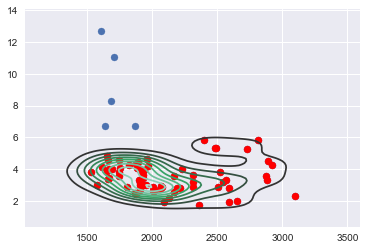

In [55]:
ax = sns.kdeplot(X_train[:,3], y_train[:,])
ax.scatter(X_train[:,3], y_train[:,]) 
# indexes of the values considered to be outliers
outliers = np.where(p > 0.002921894)
ax.scatter(X_train[outliers[0],3], y_train[outliers[0],],s=50, color='r', marker='o') 

#### Conclusion
For further analysis, it may be required to remove gas prices higher than 7 and equivalent data for oil price higher than 70 in order the improve the accuracy of the model.